<h1>Unit (and intuition) test for SIR model from ODE_Dynamics.py</h1>

<p>&nbsp;</p>

<p>Here&#39;s a basic SIR model</p>

<p>&nbsp;</p>


In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
sys.path.append("..")
import ODE_Dynamics as od

In [2]:
par=tf.constant(np.array([[1.8, 5.0E-08,0.1]], dtype=np.float32))
mod = od.SIR(par)
init_state=tf.constant(np.array([[0.001,0.999]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,200.0,num=100,dtype=np.float32))

In [3]:
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
print(results.diagnostics)


_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=222>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


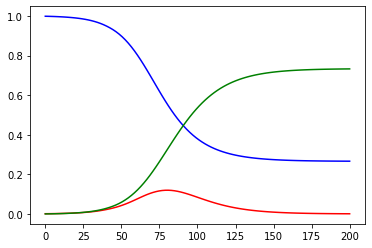

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
t = results.times ; i = results.states[:,0,0] ; s = results.states[:,0,1] ; r = 1.0 - i - s
plt.plot(t, i,"r-", t, s, "b-", t, r, "g-")

Integrating "backwards" gives garbage, because the set of states corresponding to an initial state [0,1] is measure-zero:

In [5]:
init_time = 100
soln_times = np.linspace(102.0, 0.0, 52)
soln_times = tf.constant(soln_times)
init_state = np.array([[i.numpy()[49], s.numpy()[49]]])
init_state = tf.constant(init_state)
results2 = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)

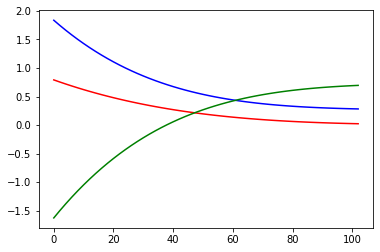

In [6]:
t2 = results2.times ; i2 = results2.states[:,0,0] ; s2 = results2.states[:,0,1] ; r2 = 1.0 - i2 - s2
plt.plot(t2, i2,"r-", t2, s2, "b-", t2, r2, "g-")